In [117]:
import xarray as xr

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy
from pathlib import Path

dir_outputs = Path("../data/outputs")
dir_fig = Path("../report/figures")

fnDvar = dir_outputs / "06_001-ecmwf-variance_v05e_2017_D.nc"
fnDmean = dir_outputs / "06_002-ecmwf-mean_v05e_2017_D.nc"

In [2]:

dsDvar = xr.load_dataset(str(fnDvar))
dsDmean = xr.load_dataset(str(fnDmean))

In [3]:
dsDvar

<xarray.Dataset>
Dimensions:              (time: 104, step: 32)
Coordinates:
  * time                 (time) datetime64[ns] 2017-01-02 ... 2017-12-28
    surface              float64 0.0
    depthBelowLandLayer  float64 100.0
  * step                 (step) timedelta64[ns] 15 days 16 days ... 46 days
    valid_time           (time, step) datetime64[ns] 2017-01-17 ... 2018-02-12
Data variables:
    t2m                  (time, step) float32 16.99 17.01 17.09 ... 11.5 12.39
    d2m                  (time, step) float32 23.17 23.45 23.92 ... 17.77 18.27
    stl4                 (time, step) float32 0.04562 0.04847 ... 0.154 0.156
    ssrd                 (time, step) float64 3.655e+09 3.42e+09 ... 4.637e+04
    strd                 (time, step) float64 7.261e+09 1.162e+10 ... 1.389e+10
    w10                  (time, step) float32 6.053 5.585 5.825 ... 7.251 9.445
    w100                 (time, step) float32 10.92 10.11 10.64 ... 13.35 17.3

In [4]:
# diff convert to hours
dsDvar.time.diff("time")/np.timedelta64(1, "h")

<xarray.DataArray 'time' (time: 103)>
array([72., 96., 72., 96., 72., 96., 72., 96., 72., 96., 72., 96., 72.,
       96., 72., 96., 72., 96., 72., 96., 72., 96., 72., 96., 72., 96.,
       72., 96., 72., 96., 72., 96., 72., 96., 72., 96., 72., 96., 72.,
       96., 72., 96., 72., 96., 72., 96., 72., 96., 72., 96., 72., 96.,
       72., 96., 72., 96., 72., 96., 72., 96., 72., 96., 72., 96., 72.,
       96., 72., 96., 72., 96., 72., 96., 72., 96., 72., 96., 72., 96.,
       72., 96., 72., 96., 72., 96., 72., 96., 72., 96., 72., 96., 72.,
       96., 72., 96., 72., 96., 72., 96., 72., 96., 72., 96., 72.])
Coordinates:
  * time                 (time) datetime64[ns] 2017-01-05 ... 2017-12-28
    surface              float64 0.0
    depthBelowLandLayer  float64 100.0

In [5]:
dsDvar_orig = dsDvar.copy()


In [60]:
dsDvar.ssrd.isel(time=0).isel(step=slice(0,-1))

<xarray.DataArray 'ssrd' (step: 31)>
array([0.07157357, 0.0669843 , 0.0699955 , 0.07472337, 0.07487077,
       0.07550142, 0.08150721, 0.08145349, 0.089701  , 0.09002021,
       0.09230952, 0.08885034, 0.08999924, 0.09592269, 0.10234569,
       0.10171547, 0.10373804, 0.10867414, 0.12007329, 0.11684995,
       0.11509151, 0.11474688, 0.12331636, 0.13134134, 0.13624152,
       0.14370919, 0.13922054, 0.15072601, 0.1513962 , 0.167532  ,
       0.17120142])
Coordinates:
    time                 datetime64[ns] 2017-01-02
    surface              float64 0.0
    depthBelowLandLayer  float64 100.0
  * step                 (step) timedelta64[ns] 15 days 16 days ... 45 days
    valid_time           (step) datetime64[ns] 2017-01-17 ... 2017-02-16

In [103]:
df.iloc[0:100]

,variable,event,surface,depthBelowLandLayer,valid_time,time,step,variance,time_parity
0,t2m,0,0.0,100.0,2017-01-18,2017-01-02,16 days,0.810911,Monday
1,t2m,1,0.0,100.0,2017-01-19,2017-01-02,17 days,0.814731,Monday
2,t2m,2,0.0,100.0,2017-01-20,2017-01-02,18 days,0.801629,Monday
3,t2m,3,0.0,100.0,2017-01-21,2017-01-02,19 days,0.821704,Monday
4,t2m,4,0.0,100.0,2017-01-22,2017-01-02,20 days,0.828719,Monday
...,...,...,...,...,...,...,...,...,...
95,t2m,95,0.0,100.0,2017-02-02,2017-01-12,21 days,0.544334,Thursday
96,t2m,96,0.0,100.0,2017-02-03,2017-01-12,22 days,0.514326,Thursday
97,t2m,97,0.0,100.0,2017-02-04,2017-01-12,23 days,0.489429,Thursday
98,t2m,98,0.0,100.0,2017-02-05,2017-01-12,24 days,0.495011,Thursday


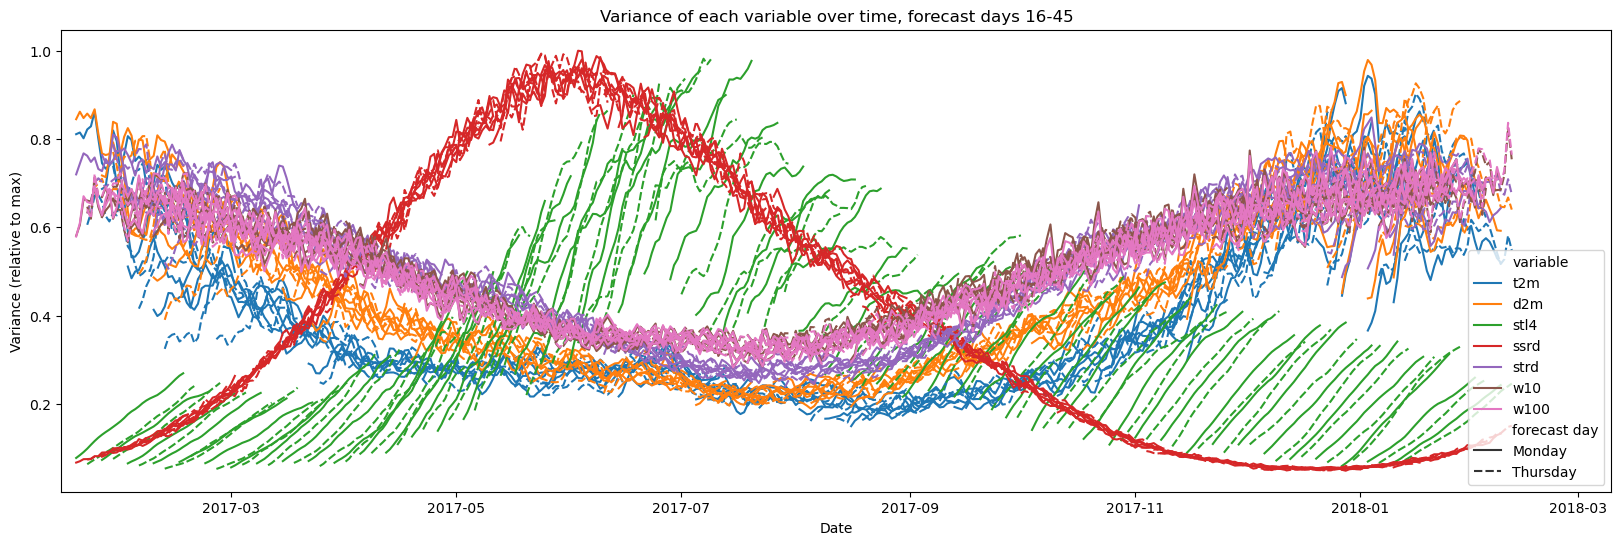

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
dsDvar = dsDvar_orig.copy()

# Normalize each variable by its maximum value
for var in dsDvar.data_vars:
    dsDvar[var] = dsDvar_orig[var] / dsDvar_orig[var].max()

#remove the last time step
dsDvar = dsDvar.isel(step=slice(1, -1))

# Convert all variables to a single dimension
ds_array = dsDvar.to_array(dim='variable')

# Flatten the data array across the time and step dimensions
ds_flat = ds_array.stack(event=('time', 'step')).reset_index('event')

# Create a DataFrame from the flat data array
df = ds_flat.to_dataframe(name="variance").reset_index()

# Add a new column to differentiate between the odd and even times
df['time_parity'] = df['time'].dt.dayofweek.map({0: 'Monday', 3: 'Thursday'})

# crop to a subset of the data step= 15 days
# df_test=df.loc[(df['step'] >= np.timedelta64(30, 'D')) & (df['step'] <= np.timedelta64(50, 'D'))]

###########
# Plot the data using seaborn
###########
# Set the figure size
plt.figure(figsize=(20, 6))

# Draw the plot
p= sns.lineplot(x="valid_time", y="variance", hue="variable", style="time_parity", units="time", estimator=None,data=df)

# Set the title
plt.title("Plot of Variables over Time")

# Set the x-axis label (Date)
plt.xlabel("Date")
# set the y-axis label (Variance (relative to max))
plt.ylabel("Variance (relative to max)")

#plot title 
plt.title("Variance of each variable over time, forecast days 16-45")

# in legend for style of line replace "time_parity"  with "forecast day"
handles, labels = p.get_legend_handles_labels()
index = labels.index('time_parity')
labels[index] = 'forecast day'
p.legend(handles, labels)

# Plot from Jan to Feb 2018
plt.xlim(pd.Timestamp('2017-01-14'), pd.Timestamp('2018-03-10'))

#remove white space around plot when saving


# Show the plot
plt.savefig(dir_fig / "011-01_variance_over_time_16-45.png", dpi=300)
plt.show()

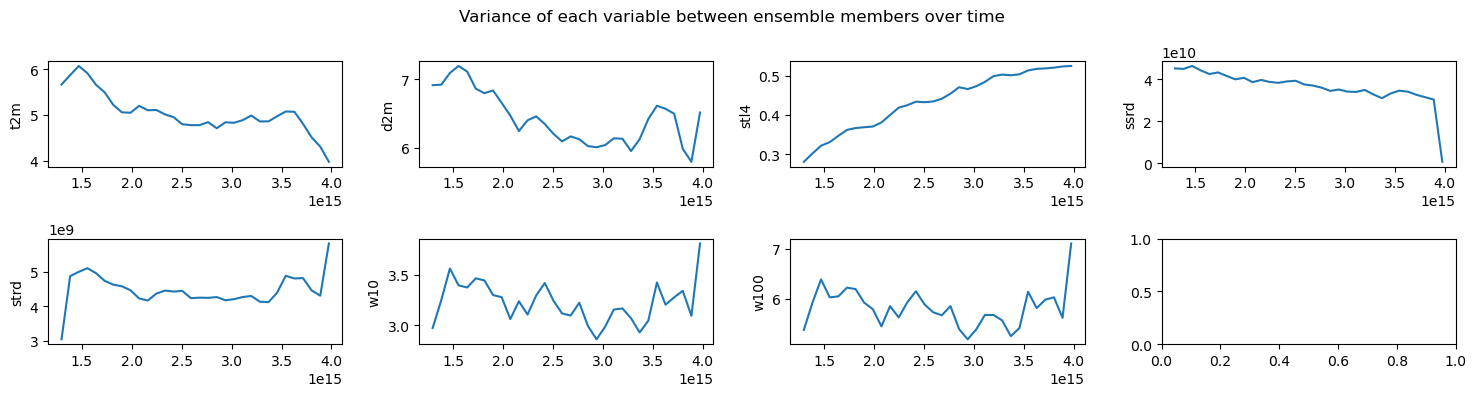

In [112]:
# Plot this for all variables (replacing var)
# as a grid of plots
# dsDvar_orig.var.isel(time=1).plot()
for j in [46]:
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 4))
    for i, var in enumerate(dsDvar.data_vars):
        dsDvar_orig[var].isel(time=j).plot(ax=axes[i//4, i%4])
        axes[i//4, i%4].set_title("")
        axes[i//4, i%4].set_xlabel(None)
        # remove 
    fig.suptitle(f"Variance of each variable between ensemble members over time")
    fig.tight_layout()

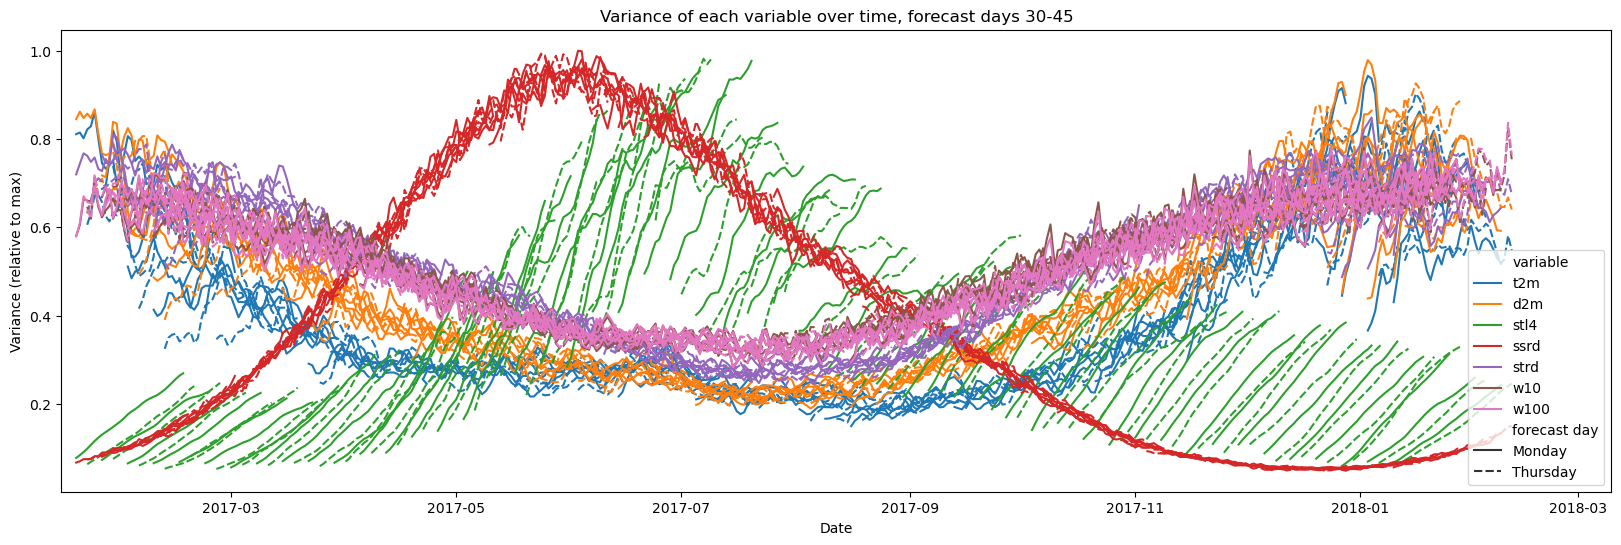

In [120]:

dsDvar = dsDvar_orig.copy()

# Normalize each variable by its maximum value
for var in dsDvar.data_vars:
    dsDvar[var] = dsDvar_orig[var] / dsDvar_orig[var].max()

#remove the last time step
dsDvar = dsDvar.isel(step=slice(1, -1))

# Convert all variables to a single dimension
ds_array = dsDvar.to_array(dim='variable')

# Flatten the data array across the time and step dimensions
ds_flat = ds_array.stack(event=('time', 'step')).reset_index('event')

# Create a DataFrame from the flat data array
df = ds_flat.to_dataframe(name="variance").reset_index()

# Add a new column to differentiate between the odd and even times
df['time_parity'] = df['time'].dt.dayofweek.map({0: 'Monday', 3: 'Thursday'})

# crop to a subset of the data step= 15 days
df_test=df.loc[(df['step'] >= np.timedelta64(30, 'D')) & (df['step'] <= np.timedelta64(46, 'D'))]

###########
# Plot the data using seaborn
###########
# Set the figure size
plt.figure(figsize=(20, 6))

# Draw the plot
p= sns.lineplot(x="valid_time", y="variance", hue="variable", style="time_parity", units="time", estimator=None,data=df)

# Set the title
plt.title("Plot of Variables over Time")

# Set the x-axis label (Date)
plt.xlabel("Date")
# set the y-axis label (Variance (relative to max))
plt.ylabel("Variance (relative to max)")

#plot title 
plt.title("Variance of each variable over time, forecast days 30-45")

# in legend for style of line replace "time_parity"  with "forecast day"
handles, labels = p.get_legend_handles_labels()
index = labels.index('time_parity')
labels[index] = 'forecast day'
p.legend(handles, labels)

# Plot from Jan to Feb 2018
plt.xlim(pd.Timestamp('2017-01-14'), pd.Timestamp('2018-03-10'))

#remove white space around plot when saving


# Show the plot
plt.savefig(dir_fig / "011-02_variance_over_time_30-45.png", dpi=300)
plt.show()

In [ ]:

dsDvar = dsDvar_orig.copy()

# Normalize each variable by its maximum value
for var in dsDvar.data_vars:
    dsDvar[var] = dsDvar_orig[var] / dsDvar_orig[var].max()

#remove the last time step
dsDvar = dsDvar.isel(step=slice(1, -1))

# Convert all variables to a single dimension
ds_array = dsDvar.to_array(dim='variable')

# Flatten the data array across the time and step dimensions
ds_flat = ds_array.stack(event=('time', 'step')).reset_index('event')

# Create a DataFrame from the flat data array
df = ds_flat.to_dataframe(name="variance").reset_index()

# Add a new column to differentiate between the odd and even times
df['time_parity'] = df['time'].dt.dayofweek.map({0: 'Monday', 3: 'Thursday'})

# crop to a subset of the data step= 15 days
df_test=df.loc[(df['step'] >= np.timedelta64(16, 'D')) & (df['step'] <= np.timedelta64(22, 'D'))]

###########
# Plot the data using seaborn
###########
# Set the figure size
plt.figure(figsize=(20, 6))

# Draw the plot
p= sns.lineplot(x="valid_time", y="variance", hue="variable", style="time_parity", units="time", estimator=None,data=df)

# Set the title
plt.title("Plot of Variables over Time")

# Set the x-axis label (Date)
plt.xlabel("Date")
# set the y-axis label (Variance (relative to max))
plt.ylabel("Variance (relative to max)")

#plot title 
plt.title("Variance of each variable over time, forecast days 16-22")

# in legend for style of line replace "time_parity"  with "forecast day"
handles, labels = p.get_legend_handles_labels()
index = labels.index('time_parity')
labels[index] = 'forecast day'
p.legend(handles, labels)

# Plot from Jan to Feb 2018
plt.xlim(pd.Timestamp('2017-01-14'), pd.Timestamp('2018-03-10'))

#remove white space around plot when saving


# Show the plot
plt.savefig(dir_fig / "011-03_variance_over_time_16-22.png", dpi=300)
plt.show()